In [1]:
import pandas as pd

# Load the first CSV file
df1 = pd.read_csv('se_data.csv')

# Load the second CSV file
df2 = pd.read_csv('se_labels.csv')
df2.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)
df1.rename(columns={'Unnamed: 0': 'sample'}, inplace=True)
# Merge the two datasets on the 'sample' column
df = pd.merge(df1, df2, on='sample', how='inner')



# Print the merged dataset
print(df)


         sample  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0      sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1      sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2      sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3      sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4      sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
..          ...     ...       ...       ...       ...        ...     ...   
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20522  gene_20523  gene_20524  \
0    7.1751

In [ ]:
#preprocessing

In [2]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


df.dropna(inplace=True)

# Check for duplicate samples
duplicate_samples = df.duplicated(subset='sample', keep='first')
print("\nDuplicate samples:")
print(df[duplicate_samples])

# Remove duplicate samples
df.drop_duplicates(subset='sample', keep='first', inplace=True)

print("\nAfter removing duplicates:")
print(df)

Missing values per column:
sample        0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20533, dtype: int64

Duplicate samples:
Empty DataFrame
Columns: [sample, gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7, gene_8, gene_9, gene_10, gene_11, gene_12, gene_13, gene_14, gene_15, gene_16, gene_17, gene_18, gene_19, gene_20, gene_21, gene_22, gene_23, gene_24, gene_25, gene_26, gene_27, gene_28, gene_29, gene_30, gene_31, gene_32, gene_33, gene_34, gene_35, gene_36, gene_37, gene_38, gene_39, gene_40, gene_41, gene_42, gene_43, gene_44, gene_45, gene_46, gene_47, gene_48, gene_49, gene_50, gene_51, gene_52, gene_53, gene_54, gene_55, gene_56, gene_57, gene_58, gene_59, gene_60, gene_61, gene_62, gene_63, gene_64, gene_65, gene_66, gene_67, gene_68, gene_69, gene_70, gene_71, gene_72, gene_73, gene_74, gene_75, gene_76, gene_77, gene_78, gene_79, gene_

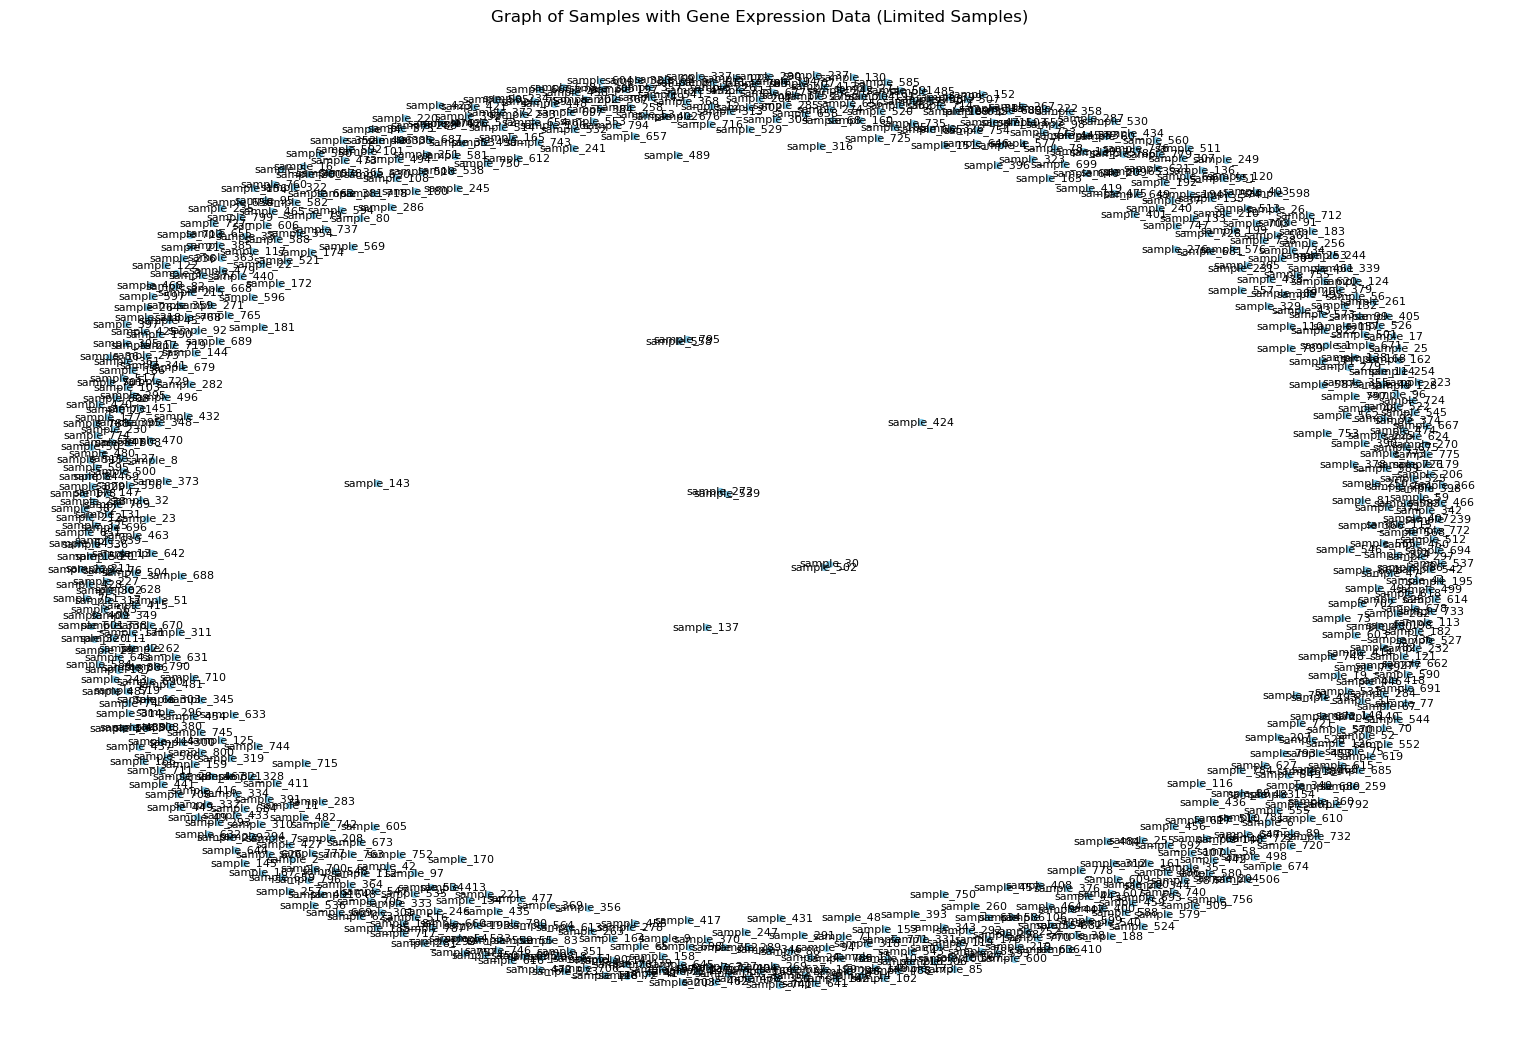

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Sample size to plot for each class
sample_size = 2

# Create a graph
G = nx.Graph()

# Add nodes (samples) to the graph
for idx, row in df.iterrows():
    G.add_node(row['sample'], Class=row['Class'])

# Add edges (relationships) based on similarity measure (e.g., correlation)
# Here, we'll use a simple method of adding edges between samples from the same class
# You may replace this with a more sophisticated method based on your application
for class_label in df['Class'].unique():
    samples_in_class = df[df['Class'] == class_label]['sample'].tolist()
    random_samples = random.sample(samples_in_class, min(sample_size, len(samples_in_class)))
    for i in range(len(random_samples)):
        for j in range(i + 1, len(random_samples)):
            G.add_edge(random_samples[i], random_samples[j])

# Add node features
# Assuming 'gene_data' is a DataFrame with log-transformed gene expression data
# Each row corresponds to a sample, and each column corresponds to a gene
node_features = {row['sample']: {col: float(row[col]) for col in df.columns[2:-1]} for idx, row in df.iterrows()}
nx.set_node_attributes(G, node_features)

# Set figure size for the plot
plt.figure(figsize=(15, 10))

# Draw the graph with customized options
pos = nx.spring_layout(G, seed=42)  # Adjust layout algorithm as needed
nx.draw(G, pos, with_labels=True, node_size=10, font_size=8, node_color='skyblue', edge_color='gray', linewidths=2.0)

# Show plot
plt.title("Graph of Samples with Gene Expression Data (Limited Samples)")
plt.show()

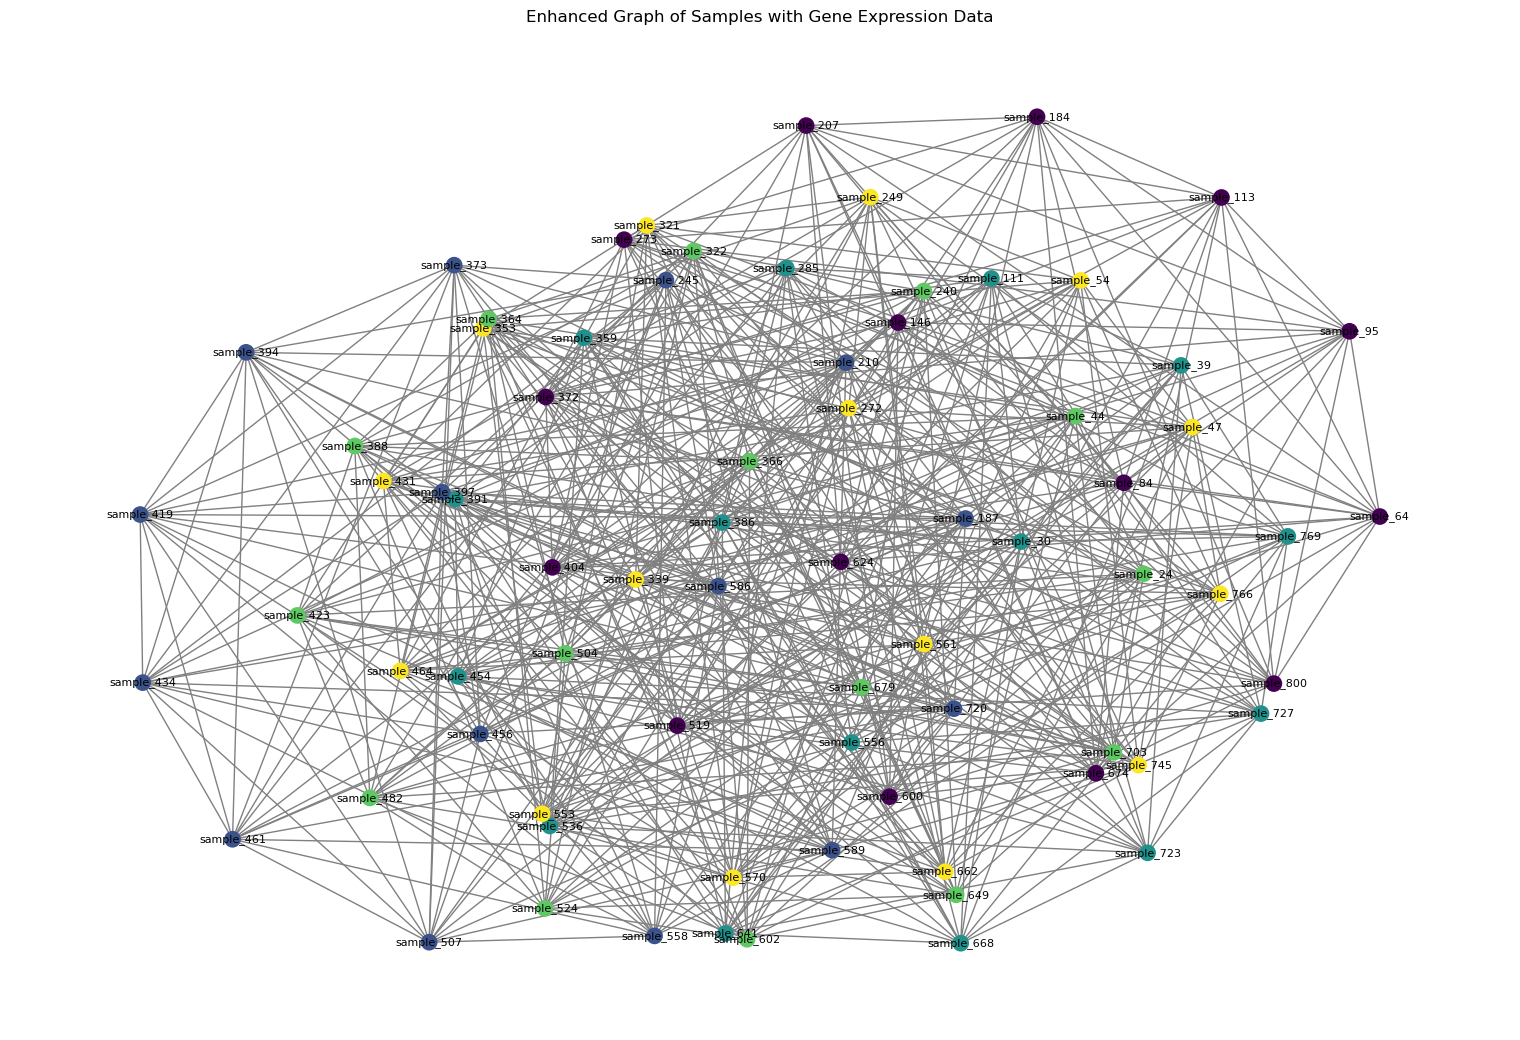

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Increase sample size to plot for each class for more representation
sample_size = 15 # Adjust this number based on your dataset and needs

# Create a graph
G = nx.Graph()

# Select more samples per class to enhance graph density and connectivity
selected_samples = []
for class_label in df['Class'].unique():
    samples_in_class = df[df['Class'] == class_label]['sample'].tolist()
    if len(samples_in_class) > sample_size:
        selected_samples.extend(random.sample(samples_in_class, sample_size))
    else:
        selected_samples.extend(samples_in_class)

# Add nodes and edges to the graph
for idx, row in df[df['sample'].isin(selected_samples)].iterrows():
    G.add_node(row['sample'], Class=row['Class'])

for class_label in df['Class'].unique():
    samples_in_class = [sample for sample in selected_samples if df.loc[df['sample'] == sample, 'Class'].values[0] == class_label]
    for i in range(len(samples_in_class)):
        for j in range(i + 1, len(samples_in_class)):
            if not G.has_edge(samples_in_class[i], samples_in_class[j]):
                G.add_edge(samples_in_class[i], samples_in_class[j])

# Set node attributes
node_features = {row['sample']: {col: float(row[col]) for col in df.columns[2:-1]} for idx, row in df[df['sample'].isin(selected_samples)].iterrows()}
nx.set_node_attributes(G, node_features)

# Use a tighter layout algorithm to make the graph more compact
pos = nx.kamada_kawai_layout(G)  # This layout tends to cluster nodes more tightly

# Drawing the graph with more distinct colors for each class
colors = [class_colors[G.nodes[node]['Class']] for node in G]
plt.figure(figsize=(15, 10))
nx.draw(G, pos, with_labels=True, node_size=100, font_size=8, node_color=colors, edge_color='gray', linewidths=2)

# Show plot
plt.title("Enhanced Graph of Samples with Gene Expression Data")
plt.show()

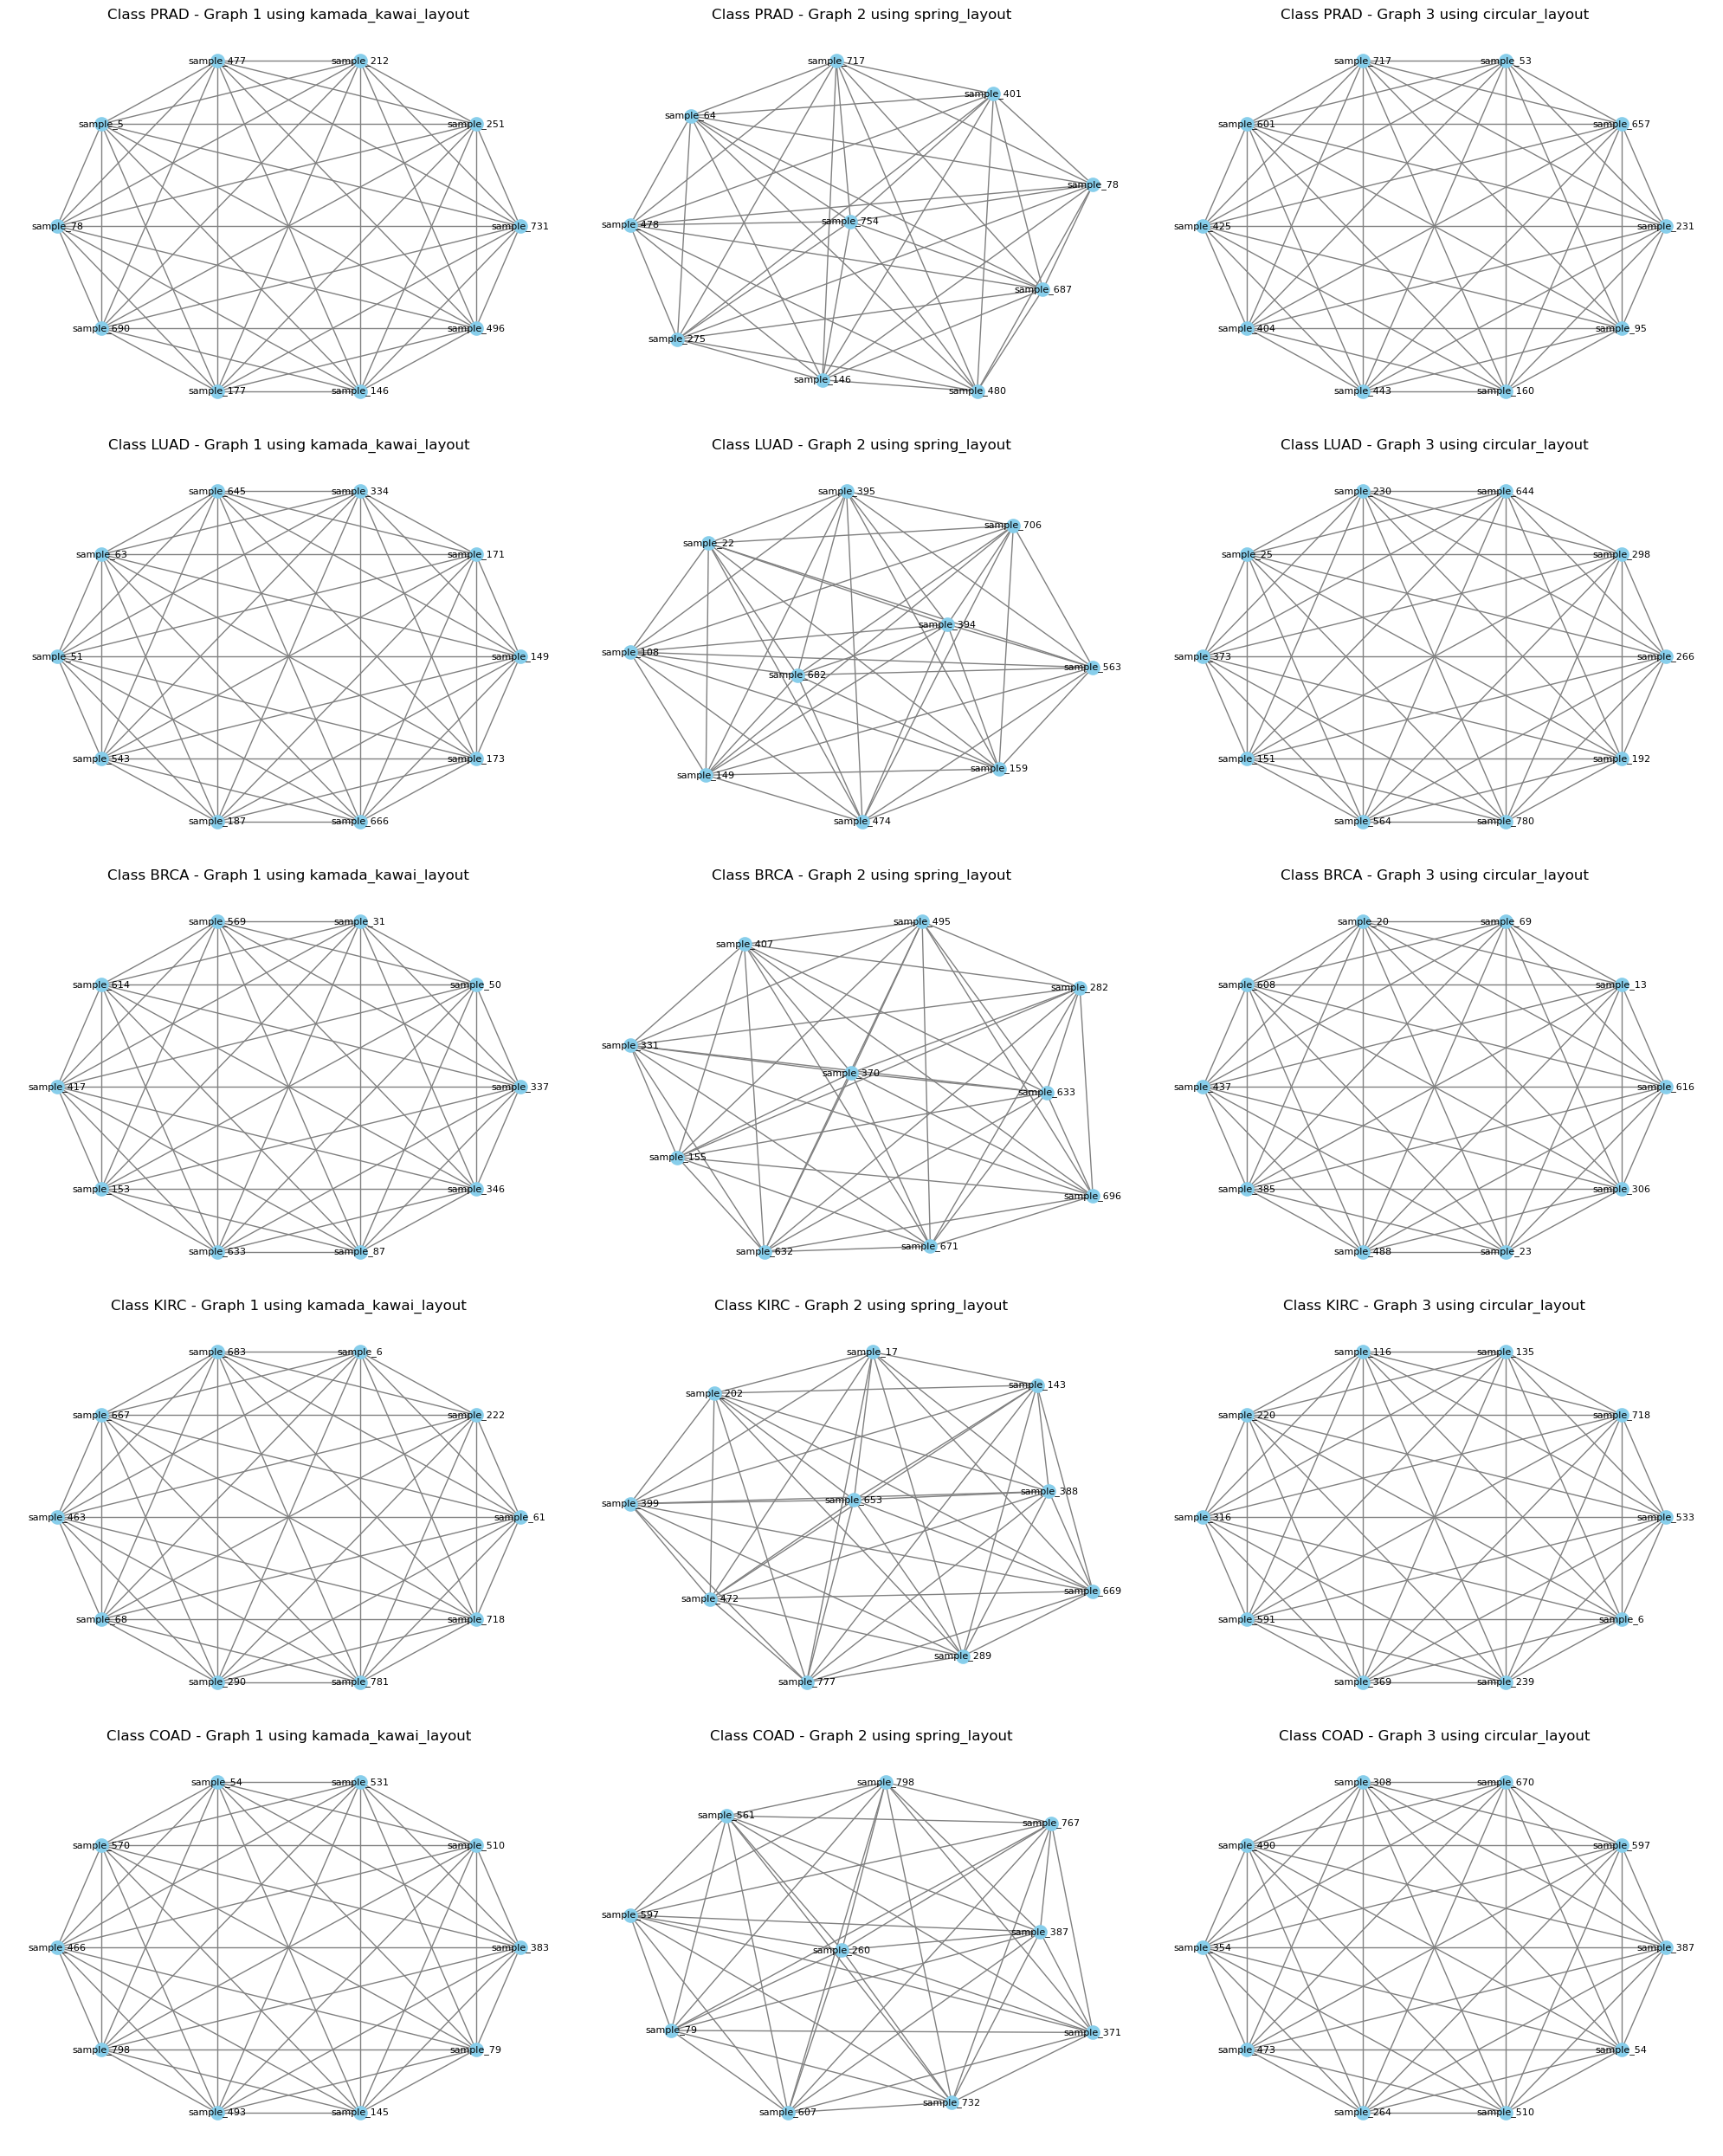

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Sample size and number of graphs
sample_size = 10
num_graphs = 3  # Number of random graphs to generate per class

# Prepare figure for plotting multiple graphs
fig, axes = plt.subplots(nrows=len(df['Class'].unique()), ncols=num_graphs, figsize=(20, 5 * len(df['Class'].unique())))
if len(df['Class'].unique()) == 1:
    axes = [axes]  # Ensure axes are iterable if there's only one class

# Define different layouts
layouts = [nx.kamada_kawai_layout, nx.spring_layout, nx.circular_layout]

for i, class_label in enumerate(df['Class'].unique()):
    # Select samples for the class
    samples_in_class = df[df['Class'] == class_label]['sample'].tolist()
    for j in range(num_graphs):
        # Create a graph for the current subplot
        G = nx.Graph()
        
        # Randomly select samples or take all if fewer than sample_size
        selected_samples = random.sample(samples_in_class, min(len(samples_in_class), sample_size)) if len(samples_in_class) > sample_size else samples_in_class
        
        # Add nodes and edges
        for sample in selected_samples:
            G.add_node(sample, Class=class_label)
        for k in range(len(selected_samples)):
            for l in range(k + 1, len(selected_samples)):
                G.add_edge(selected_samples[k], selected_samples[l])
        
        # Set node attributes if needed (optional here, depending on the data specifics)
        # node_features = {sample: {col: float(df.loc[df['sample'] == sample, col]) for col in df.columns[2:-1]} for sample in selected_samples}
        # nx.set_node_attributes(G, node_features)

        # Use a different layout for each graph
        pos = layouts[j % len(layouts)](G)
        nx.draw(G, pos, ax=axes[i][j], with_labels=True, node_size=100, font_size=8, node_color='skyblue', edge_color='gray', linewidths=2)
        axes[i][j].set_title(f"Class {class_label} - Graph {j+1} using {layouts[j % len(layouts)].__name__}")

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

  # Assume 'merged_data.csv' is your cleaned and merged file

# Separating features and target
X = df.drop(columns=['sample', 'Class'])  # Drop non-feature columns
y = df['Class']  # Target variable

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaled features and target into a new DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Class'] = y


In [7]:
    import numpy as np
    import torch
    from sklearn.neighbors import kneighbors_graph

    # Assuming X_scaled is already defined and scaled
    A = kneighbors_graph(X_scaled, n_neighbors=5, mode='connectivity', include_self=True)

    # Convert to numpy array first
    edges = np.array(A.nonzero())

    # Now convert the numpy array to a PyTorch tensor
    edge_index = torch.tensor(edges, dtype=torch.long)

In [10]:
import torch
num_nodes = df.shape[0]

train_size = int(num_nodes * 0.8)  # 80% for training
val_size = num_nodes - train_size  # Remaining for validation

# Randomly generate a permutation of node indices
perm = torch.randperm(num_nodes)

# Create train and validation masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[perm[:train_size]] = True
val_mask[perm[train_size:]] = True

mask_df = df.copy()  # Make a copy of the original DataFrame
mask_df['train_mask'] = train_mask
mask_df['val_mask'] = val_mask


In [13]:
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from torch_geometric.data import Data, DataLoader

# Assuming 'df' has already been defined and loaded as a DataFrame
features = [col for col in df.columns if col not in ['sample', 'Class']]
X = df[features]
y = df['Class'].astype('category').cat.codes  # Convert labels to categorical codes

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
x = torch.tensor(X_scaled, dtype=torch.float)  # Features tensor

# Create edge indices based on some criterion, here using a simple kneighbors graph
A = kneighbors_graph(X_scaled, n_neighbors=5, mode='connectivity', include_self=False)
A_coo = A.tocoo()  # Convert to COO format

# Now, you can access .row and .col
edge_index = torch.tensor(np.vstack([A_coo.row, A_coo.col]), dtype=torch.long)

# Convert labels to tensor
y = torch.tensor(y.values, dtype=torch.long)

# Create the graph data object
data = Data(x=x, edge_index=edge_index, y=y)

# Example of using DataLoader
batch_size = 64
loader = DataLoader(data, batch_size=batch_size, shuffle=True, drop_last=True)

# Print data details
print("Dataset length:", len(data))
for batch in loader:
    print("Batch indices:", batch)

# Continue with your model and training setup


Dataset length: 3


C:\Users\praha\anaconda3\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0: Train Loss 3.7712, Train Acc 0.1125, Val Loss 0.4112, Val Acc 0.8634
Epoch 1: Train Loss 0.8410, Train Acc 0.7937, Val Loss 0.1743, Val Acc 0.9565
Epoch 2: Train Loss 0.4297, Train Acc 0.8859, Val Loss 0.1108, Val Acc 0.9627
Epoch 3: Train Loss 0.3359, Train Acc 0.9172, Val Loss 0.0536, Val Acc 0.9814
Epoch 4: Train Loss 0.3707, Train Acc 0.9187, Val Loss 0.0334, Val Acc 0.9938
Epoch 5: Train Loss 0.3589, Train Acc 0.9375, Val Loss 0.0313, Val Acc 0.9938
Epoch 6: Train Loss 0.4826, Train Acc 0.9297, Val Loss 0.0330, Val Acc 0.9938
Epoch 7: Train Loss 0.4081, Train Acc 0.9172, Val Loss 0.0353, Val Acc 0.9938
Epoch 8: Train Loss 0.2751, Train Acc 0.9563, Val Loss 0.0384, Val Acc 0.9876
Epoch 9: Train Loss 0.3645, Train Acc 0.9375, Val Loss 0.0421, Val Acc 0.9876
Epoch 10: Train Loss 0.2725, Train Acc 0.9578, Val Loss 0.0490, Val Acc 0.9876
Epoch 11: Train Loss 0.2387, Train Acc 0.9469, Val Loss 0.0593, Val Acc 0.9876
Epoch 12: Train Loss 0.3952, Train Acc 0.9281, Val Loss 0.0694

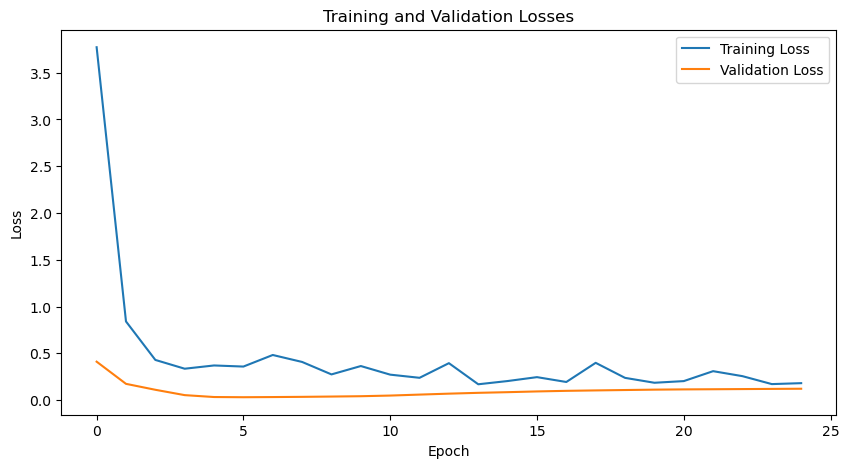

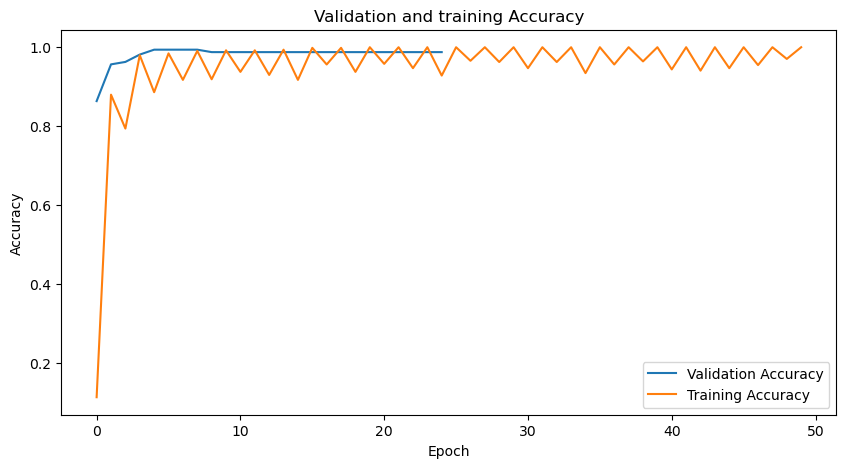

In [18]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt


# Define the GNN model
class GNN(torch.nn.Module):
    def __init__(self):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, len(pd.unique(df['Class'])))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = GNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

# Create masks
num_nodes = data.num_nodes
train_size = int(num_nodes * 0.8)
val_size = num_nodes - train_size
perm = torch.randperm(num_nodes)
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
train_mask[perm[:train_size]] = True
val_mask[perm[train_size:]] = True
data.train_mask = train_mask
data.val_mask = val_mask

import torch

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    # Calculate training accuracy after updating the model
    _, preds = torch.max(out[data.train_mask], dim=1)
    correct = preds.eq(data.y[data.train_mask]).sum().item()
    train_acc = correct / data.train_mask.sum().item()

    return loss.item(), train_acc  # Return both loss and accuracy

def validate():
    model.eval()
    out = model(data)
    loss = criterion(out[data.val_mask], data.y[data.val_mask])

    # Calculate validation accuracy
    _, preds = torch.max(out[data.val_mask], dim=1)
    correct = preds.eq(data.y[data.val_mask]).sum().item()
    val_acc = correct / data.val_mask.sum().item()

    return loss.item(), val_acc

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(25):
    train_loss, train_acc = train()  # Receive both loss and accuracy here
    val_loss, val_acc = validate()
    
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)  # Store training accuracy
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    
    print(f'Epoch {epoch}: Train Loss {train_loss:.4f}, Train Acc {train_acc:.4f}, Val Loss {val_loss:.4f}, Val Acc {val_acc:.4f}')

    model.eval()
    with torch.no_grad():
        out = model(data)
        _, pred = out[data.train_mask].max(dim=1)
        correct = float(pred.eq(data.y[data.train_mask]).sum().item())
        acc = correct / data.train_mask.sum().item()
        train_accuracies.append(acc)

# Plotting the losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Plotting the validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation and training Accuracy')
plt.legend()
plt.show()


In [19]:
# Function to get predictions and true labels from the data
def get_predictions_and_labels(data, mask):
    model.eval()
    with torch.no_grad():
        logits = model(data)
        _, predicted_labels = torch.max(logits[mask], dim=1)
        true_labels = data.y[mask]
    return predicted_labels, true_labels

# Calculate and print classification metrics
def print_classification_metrics(predicted_labels, true_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')  # Use 'weighted' if class imbalance
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

# Use these functions after training is complete
val_pred, val_true = get_predictions_and_labels(data, data.val_mask)
print_classification_metrics(val_pred.cpu().numpy(), val_true.cpu().numpy())


Accuracy: 0.9814
Precision: 0.9776
Recall: 0.9776
F1 Score: 0.9776
Confusion Matrix:
[[57  1  0  0  0]
 [ 0 16  0  1  0]
 [ 0  0 23  0  0]
 [ 1  0  0 27  0]
 [ 0  0  0  0 35]]


In [15]:
import seaborn as sns

# Calculate and print classification metrics including confusion matrix heatmap
def print_classification_metrics(predicted_labels, true_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='macro')  # Use 'weighted' if class imbalance
    recall = recall_score(true_labels, predicted_labels, average='macro')
    f1 = f1_score(true_labels, predicted_labels, average='macro')
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)

    # Create heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Accuracy: 0.9814
Precision: 0.9776
Recall: 0.9776
F1 Score: 0.9776
Confusion Matrix:
[[57  1  0  0  0]
 [ 0 16  0  1  0]
 [ 0  0 23  0  0]
 [ 1  0  0 27  0]
 [ 0  0  0  0 35]]


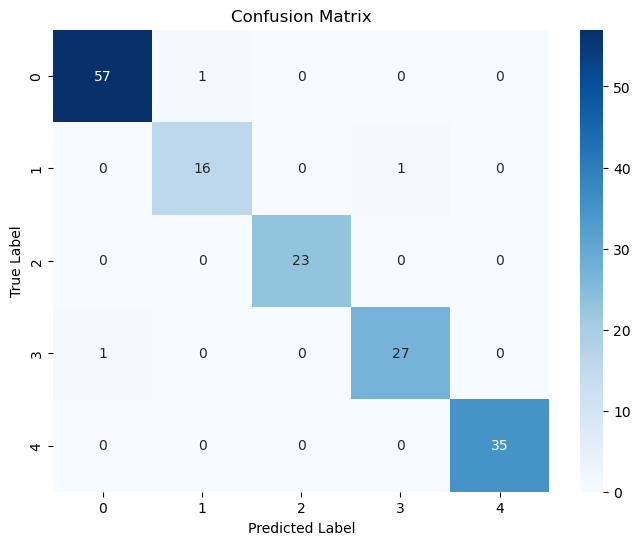

In [17]:
# Use these functions after training is complete
val_pred, val_true = get_predictions_and_labels(data, data.val_mask)
print_classification_metrics(val_pred.cpu().numpy(), val_true.cpu().numpy())
